# Sentiment Analysis of ChatGPT Headlines from Reddit API using PRAW

> In this project, we will be analysing the sentiments of the hot headlines of cryptocurrency and build a Latent Dirichlet Allocation model for topical breakdown of the headlines

In [2]:
from pprint import pprint
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
!pip install praw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import praw

user_agent = "Scraper 2.0 "

reddit = praw.Reddit(
    client_id= "_Uo3nM1f56IgXOyVNCM6vg" ,
    client_secret= "ygMugrUmfpiuVOjQz4KEJxdZejrvKg",
    user_agent=user_agent,
    check_for_sync=False
)

In [6]:
headlines = set()

for submission in reddit.subreddit('chatgpt').hot(limit=None):
  headlines.add(submission.title)

print(len(headlines))


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

751


In [7]:
df = pd.DataFrame(headlines)
df.head()

,0
0,I made Bard and ChatGPT have a chat together!
1,ChatGPT invents word origin
2,openai i screwing themselves hard.
3,Infinite loop where ChatGPT constantly underst...
4,Every Google Search is Showing up in ChatGPT


In [8]:
# df.to_csv("headlines.csv", index=False, header=False, encoding="utf-8")

In [9]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [11]:
sia = SIA()
results = []

for line in headlines:
  pol_score = sia.polarity_scores(line)
  pol_score['headline'] = line
  results.append(pol_score)


pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'I made Bard and ChatGPT have a chat together!',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'ChatGPT invents word origin', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': -0.3182,
  'headline': 'openai i screwing themselves hard.',
  'neg': 0.623,
  'neu': 0.377,
  'pos': 0.0}]


In [12]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.0,0.0000,I made Bard and ChatGPT have a chat together!
1,0.000,1.000,0.0,0.0000,ChatGPT invents word origin
2,0.623,0.377,0.0,-0.3182,openai i screwing themselves hard.
3,0.193,0.807,0.0,-0.4767,Infinite loop where ChatGPT constantly underst...
4,0.000,1.000,0.0,0.0000,Every Google Search is Showing up in ChatGPT


In [13]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.0,0.0000,I made Bard and ChatGPT have a chat together!,0
1,0.000,1.000,0.0,0.0000,ChatGPT invents word origin,0
2,0.623,0.377,0.0,-0.3182,openai i screwing themselves hard.,-1
3,0.193,0.807,0.0,-0.4767,Infinite loop where ChatGPT constantly underst...,-1
4,0.000,1.000,0.0,0.0000,Every Google Search is Showing up in ChatGPT,0


In [14]:
from wordcloud import WordCloud, STOPWORDS
stopwords = STOPWORDS

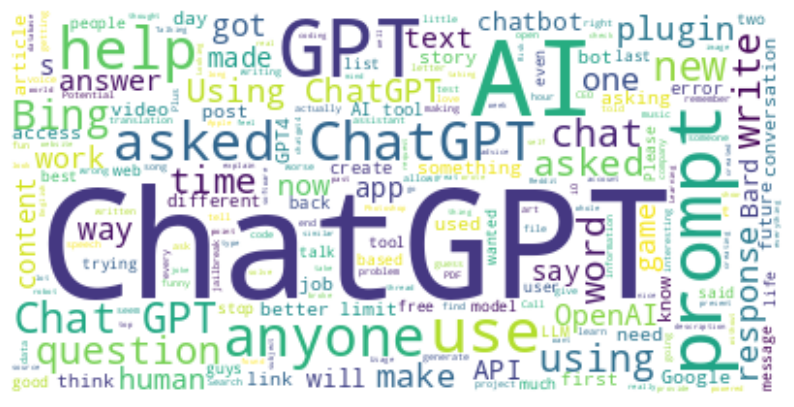

In [15]:
text = " ".join(i for i in df['headline'])
wordcloud2 = WordCloud(stopwords=stopwords, background_color="white", max_words=300).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df2 = df[['headline','label']]
df.label.value_counts(normalize=True) * 100

label
 0    58.322237
 1    28.495340
-1    13.182423
Name: proportion, dtype: float64

In [17]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("Negative headlines:\n")
pprint(list(df[df['label'] == - 1].headline[:5]), width=200)

Positive headlines:

['I asked ChatGPT how to deal with the price increase of the Reddit API.',
 'It would be great if it allowed searching the entire web on a niche topic',
 'Better Than JW4?',
 'How exactly is THIS supposed to be a major disruptor. It cant even freaking count.',
 'Training Chatbot to chat like deceased']
Negative headlines:

['openai i screwing themselves hard.',
 "Infinite loop where ChatGPT constantly understaning it's wrong and trying to correct while responding",
 'I think I broke it',
 'Potential criticism of a German politician is flagged as a policy violation',
 'Knowing ChatGPT fails in reversing the word "lollipop", I asked it why.']


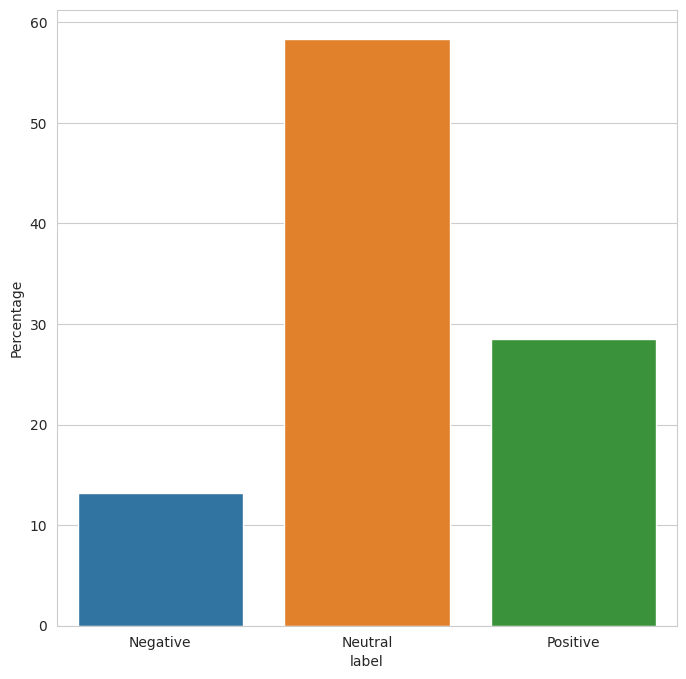

In [18]:
f, ax = plt.subplots(figsize=(8,8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [19]:
import re
df['headline_processed'] = df['headline'].map(lambda x : re.sub('[,\.!?]', '', x))
df['headline_processed'] = df['headline_processed'].map(lambda x : x.lower())
df.head()

,neg,neu,pos,compound,headline,label,headline_processed
0,0.000,1.000,0.0,0.0000,I made Bard and ChatGPT have a chat together!,0,i made bard and chatgpt have a chat together
1,0.000,1.000,0.0,0.0000,ChatGPT invents word origin,0,chatgpt invents word origin
2,0.623,0.377,0.0,-0.3182,openai i screwing themselves hard.,-1,openai i screwing themselves hard
3,0.193,0.807,0.0,-0.4767,Infinite loop where ChatGPT constantly underst...,-1,infinite loop where chatgpt constantly underst...
4,0.000,1.000,0.0,0.0000,Every Google Search is Showing up in ChatGPT,0,every google search is showing up in chatgpt


In [20]:
import gensim 
from gensim.utils import simple_preprocess

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
stop_words = stopwords.words('english')
stop_words.extend(['chatgpt','chat','gpt','ai','google','asked'])

In [23]:
def sentence_to_words(stncs):
  for i in stncs:
    yield(simple_preprocess(str(i), deacc=True))

In [24]:
def rm_stopwords(texts):
  return [[word for word in simple_preprocess(str(doc)) if not word in stop_words] for doc in texts]

In [25]:
data = df.headline_processed.values.tolist()
data_words = list(sentence_to_words(data))

In [26]:
# remove stop words
data_words = rm_stopwords(data_words)
print(data_words[:1][0][:30])

['made', 'bard', 'together']


In [27]:
import gensim.corpora as corpora 
id2word = corpora.Dictionary(data_words)

In [28]:
txt = data_words
corpus = [id2word.doc2bow(text) for text in txt]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [29]:
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes=5,
                                       iterations=100)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"game" + 0.008*"good" + 0.008*"prompt" + 0.008*"translation" + '
  '0.006*"bing" + 0.006*"time" + 0.006*"written" + 0.005*"like" + 0.005*"even" '
  '+ 0.005*"answer"'),
 (1,
  '0.009*"response" + 0.007*"please" + 0.007*"get" + 0.007*"words" + '
  '0.007*"something" + 0.005*"stop" + 0.005*"account" + 0.005*"limit" + '
  '0.005*"generative" + 0.005*"long"'),
 (2,
  '0.015*"use" + 0.012*"get" + 0.011*"tools" + 0.010*"anyone" + 0.007*"help" + '
  '0.007*"prompt" + 0.005*"bot" + 0.005*"days" + 0.005*"question" + '
  '0.005*"trying"'),
 (3,
  '0.012*"using" + 0.011*"bard" + 0.010*"like" + 0.009*"api" + 0.009*"text" + '
  '0.006*"openai" + 0.006*"could" + 0.006*"create" + 0.006*"get" + '
  '0.006*"speech"'),
 (4,
  '0.012*"write" + 0.010*"got" + 0.008*"bing" + 0.008*"using" + 0.005*"know" + '
  '0.005*"access" + 0.005*"anyone" + 0.005*"content" + 0.005*"explain" + '
  '0.005*"two"'),
 (5,
  '0.013*"way" + 0.010*"using" + 0.010*"human" + 0.009*"like" + 0.008*"asking" '
  '+ 0.008

In [30]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.146573 -0.021814       1        1  11.872297
3     -0.102549 -0.022712       2        1  10.877530
0      0.023018  0.159323       3        1  10.809587
5      0.011338  0.017809       4        1  10.280274
4      0.010464  0.044990       5        1   9.903475
6      0.020338 -0.074557       6        1   9.640903
2      0.043455 -0.076454       7        1   9.406224
9     -0.001154  0.036444       8        1   9.228058
7      0.059439 -0.008645       9        1   9.224219
1      0.082225 -0.054384      10        1   8.757431, topic_info=             Term       Freq      Total Category  logprob  loglift
524          make  10.000000  10.000000  Default  30.0000  30.0000
45          would   9.000000   9.000000  Default  29.0000  29.0000
58            way   9.000000   9.000000  Default  28.0000  28.0000
304         tools   7.000000   7.000000  Default  27.0000  27.0000
91            get  14.000000  14.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
317   information   1.325145   4.533265  Topic10  -5.5949   1.2053
58            way   1.325140   9.300207  Topic10  -5.5949   0.4867
502          back   1.325138   6.455228  Topic10  -5.5949   0.8519
79         anyone   1.325137  16.539500  Topic10  -5.5949  -0.0890
1113          day   1.325137   4.489671  Topic10  -5.5949   1.2150

[645 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1444      9  0.770179      accent
129       2  0.153910      access
129       5  0.307820      access
129       6  0.153910      access
129       7  0.153910      access
...     ...       ...         ...
16        7  0.253898       wrong
920       3  0.252552       wrote
920       5  0.252552       wrote
920       8  0.252552       wrote
1803      8  0.770576  wwwdorarun

[1130 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 1, 6, 5, 7, 3, 10, 8, 2])